# LOGISTIC REGRESSION

## Importing the libraries

In [7]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn import linear_model 
import matplotlib.pyplot as plt
from scipy.stats import skew
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model as lm
import sklearn.metrics as metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats

## reading the dataset

In [8]:
fraud=pd.read_csv("fraud.csv")
fraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-0.698044,-0.044198,1.681167,0.974523,-0.245693,0.347156,0.195166,0.083709,0.332076,...,-0.025289,0.383462,-0.177126,0.110510,0.246612,-0.392311,0.337487,-0.064181,149.62,0
1,0.0,0.611828,0.161626,0.110348,0.316899,0.043586,-0.061836,-0.064189,0.072178,-0.233160,...,-0.311883,-0.881473,0.162398,-0.561148,0.320729,0.261163,-0.022699,0.044887,2.69,0
2,1.0,-0.697298,-0.813846,1.175337,0.268550,-0.365429,1.351797,0.644689,0.210063,-1.382624,...,0.342582,1.065046,1.458087,-1.138128,-0.628605,-0.288550,-0.139870,-0.182155,378.66,0
3,1.0,-0.496026,-0.112483,1.188450,-0.610452,-0.007486,0.936388,0.193546,0.320117,-1.266119,...,-0.149605,0.007278,-0.305146,-1.941089,1.242039,-0.460383,0.158494,0.187356,123.50,0
4,2.0,-0.594568,0.533027,1.026537,0.284994,-0.295709,0.072017,0.482983,-0.229449,0.746458,...,-0.013027,1.101757,-0.220391,0.233258,-0.395245,1.041986,0.554455,0.655902,69.99,0


## Shape of the dataset

In [9]:
print("shape \n")
print(fraud.shape)

shape 

(283726, 31)


## columns in the dataset

In [10]:
print("Columns \n")
print(fraud.columns)

Columns 

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


## descibe the dataset

In [11]:
print("Describe \n")
print(fraud.describe())

Describe 

                Time             V1             V2             V3  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean    94811.077600       0.003038      -0.002511       0.001069   
std     47481.047891       1.000000       1.000000       1.000000   
min         0.000000     -28.956239     -44.158375     -32.031662   
25%     54204.750000      -0.470195      -0.364559      -0.589708   
50%     84692.500000       0.010464       0.038835       0.119285   
75%    139298.000000       0.675590       0.485991       0.680700   
max    172792.000000       1.260214      13.395087       6.219043   

                  V4             V5             V6             V7  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean       -0.002098       0.001327      -0.000856       0.001467   
std         1.000000       1.000000       1.000000       1.000000   
min        -4.018693     -82.601759     -19.641043     -35.479777   
25%        -0.601148  

## Info of the dataset

In [12]:
print("Info \n")
print(fraud.info())

Info 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283726 entries, 0 to 283725
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21

## datatypes of the dataset

In [13]:
print("Checking the Datatypes \n")
print(fraud.dtypes)

Checking the Datatypes 

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


## checking null values

In [14]:
print("Counting the null values \n")
print(fraud.isnull().sum())

Counting the null values 

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


## checking NA values

In [15]:
print("Counting the NAN values \n")
print(fraud.isna().sum())

Counting the NAN values 

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


## checking infinity values

In [16]:
ds = fraud.isin([np.inf, -np.inf]) 
 
count = np.isinf(fraud).values.sum() 
print("It contains " + str(count) + " infinite values") 


It contains 0 infinite values


## Checking skewness

In [17]:
columns=fraud.columns
for i in range(0,len(columns)): 
    skew_values = skew(fraud[columns[i]])
    print("Skewness of ",columns[i],": \t",skew_values)

Skewness of  Time : 	 -0.03558045812827333
Skewness of  V1 : 	 -3.273253943314649
Skewness of  V2 : 	 -4.695137078165381
Skewness of  V3 : 	 -2.1519725799940663
Skewness of  V4 : 	 0.6715006205655537
Skewness of  V5 : 	 -2.4140664842156148
Skewness of  V6 : 	 1.829870709562578
Skewness of  V7 : 	 2.890255912433972
Skewness of  V8 : 	 -8.310926391626731
Skewness of  V9 : 	 0.5376602109334491
Skewness of  V10 : 	 1.252960454562293
Skewness of  V11 : 	 0.3440723742059195
Skewness of  V12 : 	 -2.198996655901223
Skewness of  V13 : 	 0.06429306473390332
Skewness of  V14 : 	 -1.9187935694299711
Skewness of  V15 : 	 -0.309657445188475
Skewness of  V16 : 	 -1.0511559142385323
Skewness of  V17 : 	 -3.690477683233228
Skewness of  V18 : 	 -0.24866014274940973
Skewness of  V19 : 	 0.108311238309753
Skewness of  V20 : 	 -2.0431102544579143
Skewness of  V21 : 	 2.8200182046255957
Skewness of  V22 : 	 -0.18232876403467316
Skewness of  V23 : 	 -5.8671897721920265
Skewness of  V24 : 	 -0.552126317675853

## scatterplot comparing features

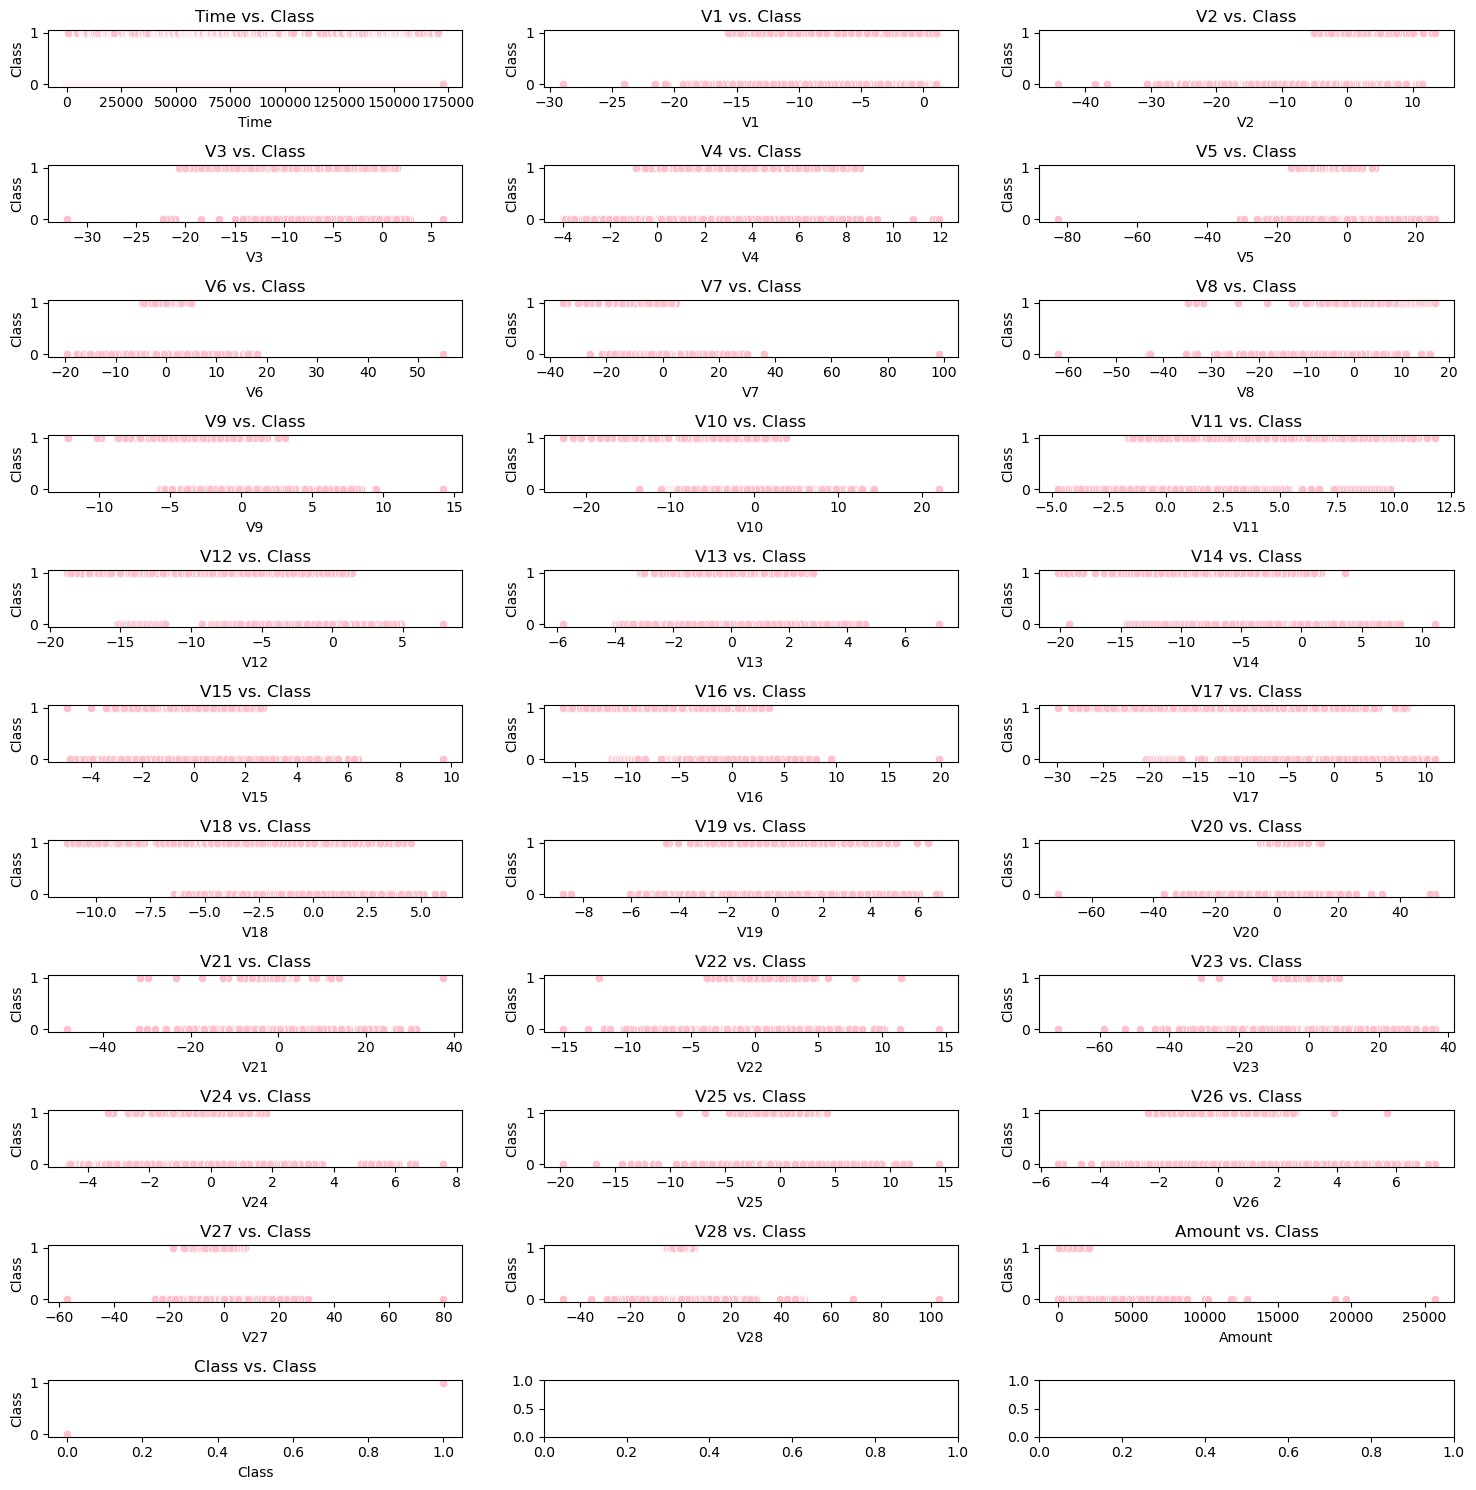

In [18]:
# Get all features
columns = fraud.columns

##setting up the subplots
fig, axes = plt.subplots(nrows=11, ncols=3, figsize=(15, 15))

# Flatten the 2D array of subplots to make indexing easier
axes = axes.flatten()

# Loop through each feature and plot a scatter plot
for i, column in enumerate(columns):
    ax = axes[i]
    sns.scatterplot(x=column, y='Class', data=fraud, ax=ax, color='pink')
    ax.set_title(f'{column} vs. Class')

# Adjust layout to prevent clipping of titles and labels
plt.tight_layout()

# Display all plots
plt.show()


## histogram depicting distribution of data

C:\Users\vishw\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vishw\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vishw\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vishw\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

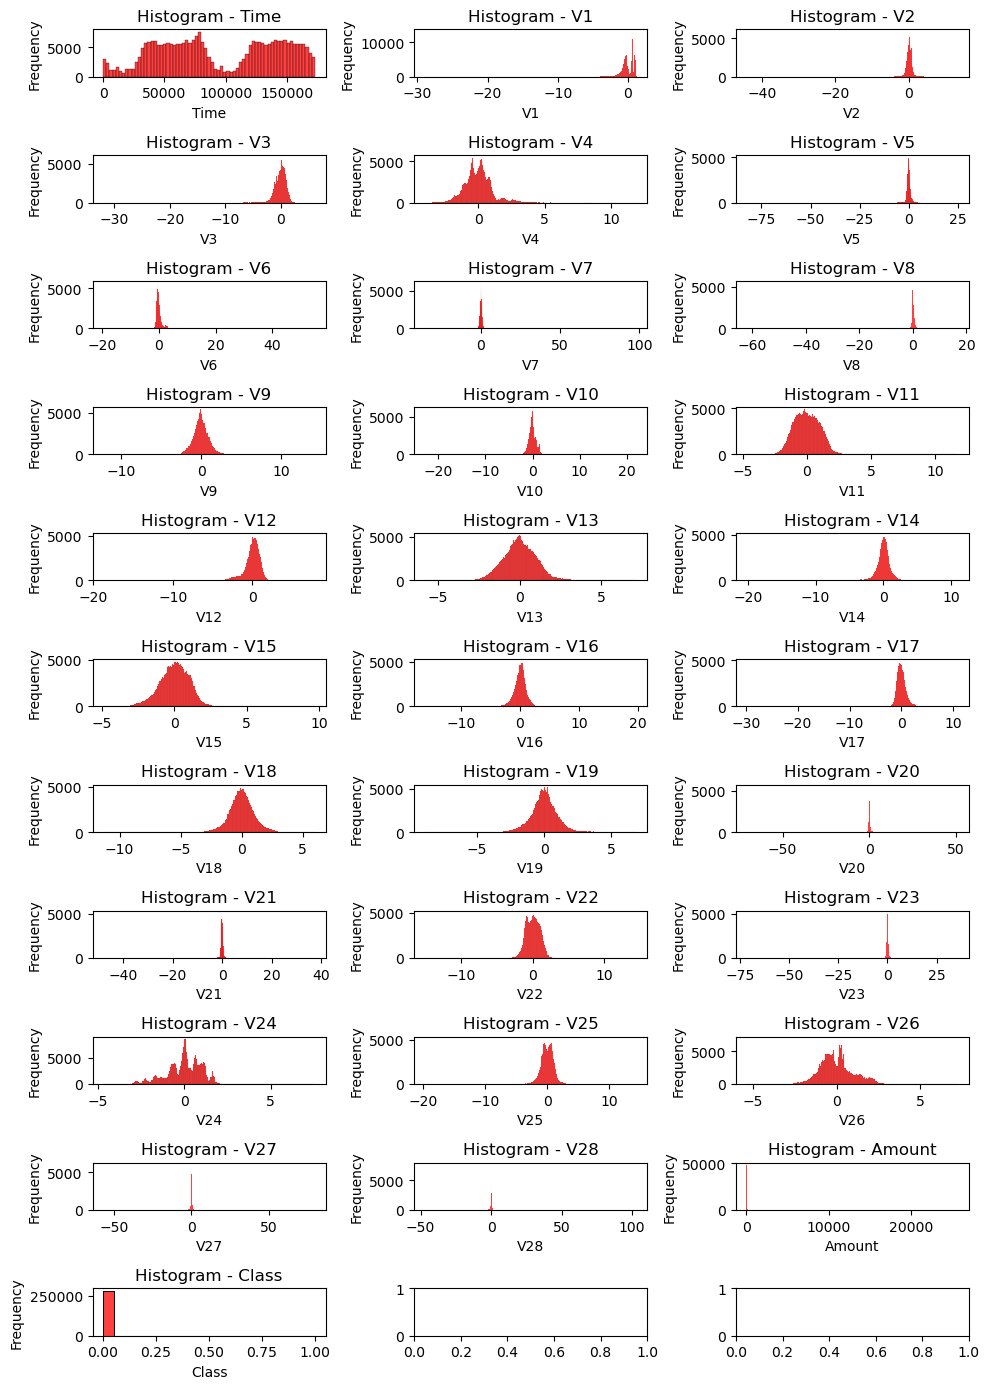

In [19]:
fig, axes = plt.subplots(nrows=11, ncols=3, figsize=(10, 14))

columns=fraud.columns
# Flatten the 2D array of subplots to make indexing easier
axes = axes.flatten()

# Loop through each feature and plot a histogram
for i, column in enumerate(columns):
    ax = axes[i]
    sns.histplot(fraud[column], color='red', ax=ax)
    ax.set_title(f'Histogram - {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Adjust layout to prevent clipping of titles and labels
plt.tight_layout()

plt.show()

## correlation graph

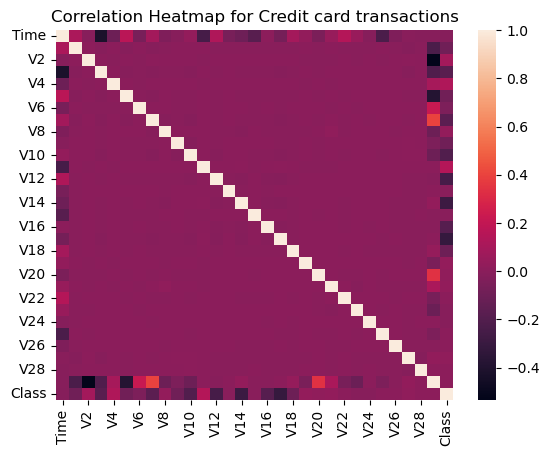

In [20]:
sns.heatmap(fraud.corr())
plt.title('Correlation Heatmap for Credit card transactions')
plt.show()

In [21]:
fraud[fraud["Class"]==1]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
534,406.0,-1.186959,1.185394,-1.067058,2.827005,-0.379219,-1.071036,-2.066842,1.180316,-2.528625,...,0.714499,-0.048374,-0.745886,0.528706,0.085413,0.368922,0.659884,-0.436781,0.00,1
616,472.0,-1.562372,-1.917351,0.721466,1.618349,0.987507,-0.799458,0.265198,-0.057498,-0.247334,...,0.914059,0.601031,2.206126,-0.485123,0.536813,-0.301547,-0.638729,0.109028,529.00,1
4886,4462.0,-1.182402,1.068345,-0.238450,1.647765,-0.596676,-0.056901,0.458040,-0.338531,-0.217485,...,-0.406358,-1.286855,0.276937,-0.144197,-0.299517,-1.125660,0.099979,-0.466513,239.93,1
6072,6986.0,-2.257657,0.824901,-1.718616,1.894935,-0.819262,-1.281250,-2.847846,-0.210998,-0.226170,...,0.792329,0.244245,-0.699383,-0.088341,0.484258,-1.363933,-2.090078,2.589953,59.00,1
6293,7519.0,0.633582,1.833810,-2.853217,3.346661,2.631938,-1.019382,1.395696,-0.420980,-1.171033,...,-0.523641,-0.971887,-1.053074,-2.695807,2.856568,1.175799,-0.025310,0.447503,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278813,169142.0,-0.989660,0.683580,-2.994886,1.236962,-1.137602,-1.509459,-0.719130,0.591331,-1.884947,...,1.075527,-0.440534,1.025199,-0.486909,1.031239,1.635495,0.739569,0.451085,390.00,1
279090,169347.0,0.707670,0.783008,-3.316966,0.998349,0.321407,-0.995950,-1.151105,0.210784,-1.029122,...,0.511959,0.038968,-0.233509,-0.133827,1.001255,1.533996,0.983343,0.568968,0.76,1
279096,169351.0,-0.347091,0.684013,-1.467307,0.331151,-0.813750,-0.002512,-1.820318,1.026380,-0.595394,...,1.038563,1.151207,0.306146,0.052954,-1.419160,0.977301,0.973123,0.592517,77.89,1
280081,169966.0,-1.598455,0.355780,-3.579104,1.284905,-0.610467,-2.209986,-1.798539,0.897951,-1.490045,...,0.805731,-0.371553,-0.731291,-0.303255,-0.629614,1.257364,2.235980,-0.773414,245.00,1


## Logisting regression without sampling and scaling

283726
confusion matrix 
 [[28318     0]
 [   17    38]]
class counts [28318    55]
total_samples 28373
class_weights [  0.50097111 257.93636364]
weighted_accuracy 0.8454545454545453
explained_variance is  0.69
r2 is  0.6903
MAE is  0.0006
MSE is  0.0006
RMSE is 0.0245


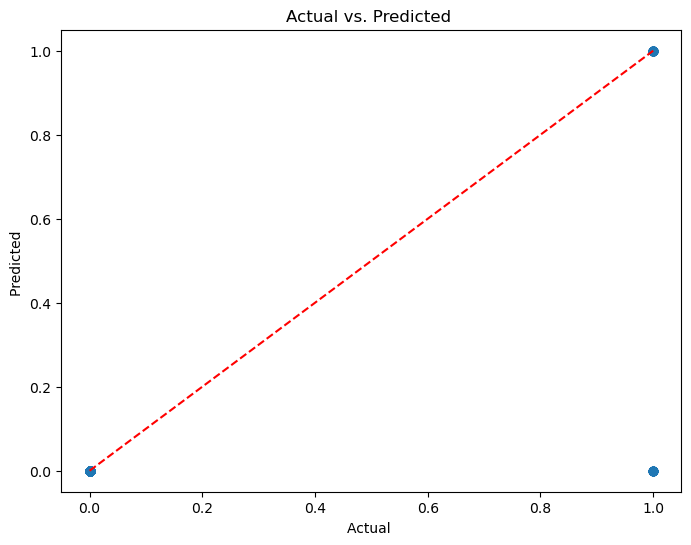

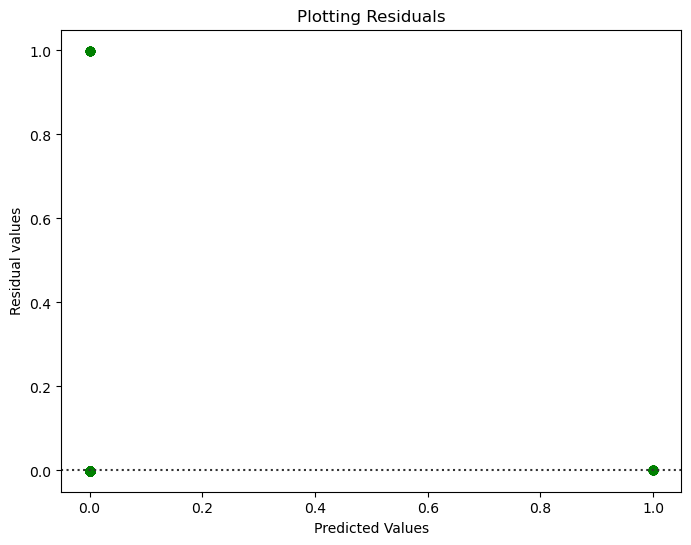

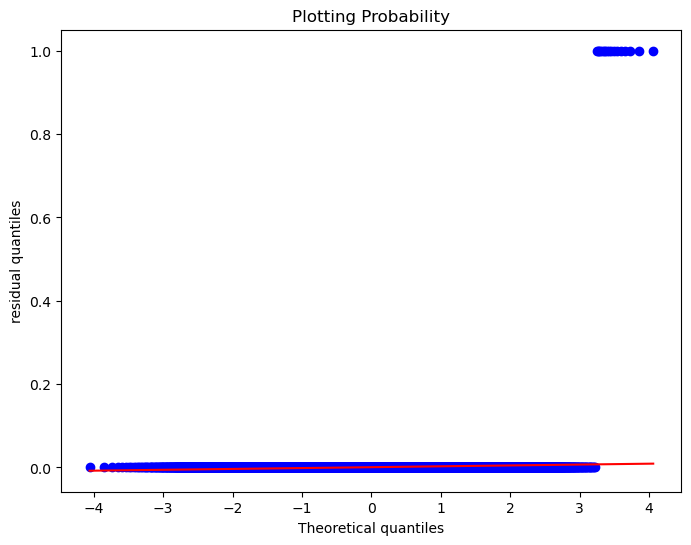

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from collections import Counter
import matplotlib.pyplot as plt

model = LogisticRegression(max_iter=1000000)

df=fraud
df=df.drop(["Time"],axis=1)

x=df.drop(["Class"],axis=1)
y=df["Class"]



x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=50)

final=len(x_train)+len(x_test)

print(final)


x_1=np.array(x_train)

# 'occ_managprof', 'occ_service','occ_service_np', 'occ_service_broad'
x_test_arr=np.array(x_test)



y_1=np.array(y_train)

regr = LogisticRegression(solver='liblinear')
regr.fit(x_1, y_1)
#print(regr.intercept_, regr.coef_,regr.score(x_1, y_1))

y_predict = regr.predict(x_test_arr)




# Generate example binary classification data with imbalanced classes
#actual = np.concatenate(y_1, y_predict)  # Imbalanced classes
#predicted = np.concatenate(y_1, y_predict)  # Imbalanced predictions

# Compute confusion matrix
cm = confusion_matrix(y_test, y_predict)
print("confusion matrix \n",cm)

def check_class_weights(y_train,y_test,y_predict):
  
    class_counts = np.bincount(y_test)
    print("class counts",class_counts)
    # Compute total number of samples
    total_samples = np.sum(class_counts)
    print("total_samples",total_samples)
    # Calculate class weights
    class_weights = total_samples / (len(class_counts) * class_counts)
    print("class_weights",class_weights)
    # Print class weights
   
    weighted_accuracy = accuracy_score(y_test, y_predict, sample_weight=class_weights[y_test])
    print("weighted_accuracy",weighted_accuracy)

check_class_weights(y_1,y_test,y_predict)

def regression_results(y_1, y_predict):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_test, y_predict)
    mean_absolute_error=metrics.mean_absolute_error(y_test, y_predict) 
    mse=metrics.mean_squared_error(y_test, y_predict) 
    #mean_squared_log_error=metrics.mean_squared_log_error(y_test, predicted)
    median_absolute_error=metrics.median_absolute_error(y_test, y_predict)
    r2=metrics.r2_score(y_test, y_predict)

    print('explained_variance is ', round(explained_variance,2))    
    #print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2 is ', round(r2,4))
    print('MAE is ', round(mean_absolute_error,4))
    print('MSE is ', round(mse,4))
    print('RMSE is', round(np.sqrt(mse),4))
    

def predicted_plot(y_test, y_predict):
    plt.subplots(figsize=(8,6))
    plt.scatter(y_test, y_predict)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
    plt.xlabel("Actual ")
    plt.ylabel("Predicted ")
    plt.title("Actual vs. Predicted ")
    plt.show()
    
def residual_plot(y_test, y_predict):
    residual_value = y_test - y_predict
    plt.figure(figsize=(8,6))
    sns.residplot(x=y_predict, y=residual_value ,scatter_kws={"color": "green"})
    plt.title("Plotting Residuals")
    plt.xlabel("Predicted Values")
    plt.ylabel("Residual values")
    plt.show()
    return residual_value

def probability_plot(residual):
    plt.subplots(figsize=(8,6))
    stats.probplot(residual, plot=plt)
    plt.title('Plotting Probability')
    plt.xlabel('Theoretical quantiles')
    plt.ylabel('residual quantiles')
   
    plt.show()
    
regression_results(y_test,y_predict)
predicted_plot(y_test,y_predict)
residuals=residual_plot(y_test,y_predict)
probability_plot(residuals)


## Logistic Regression after sampling and scaling

566506
confusion matrix is 
 [[27952   534]
 [ 1880 26285]]
class counts [28486 28165]
total_samples 56651
class_weights [0.99436565 1.00569856]
weighted_accuracy 0.9572522187515
explained_variance is  0.83
r2 is  0.8295
MAE is  0.0426
MSE is  0.0426
RMSE is 0.2064


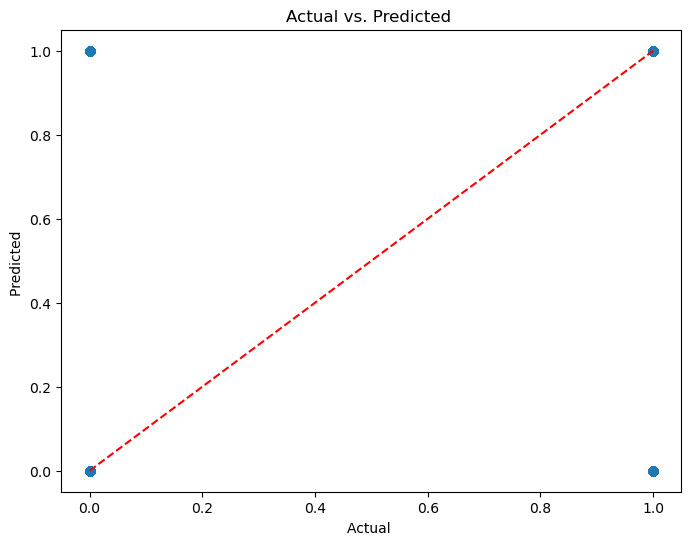

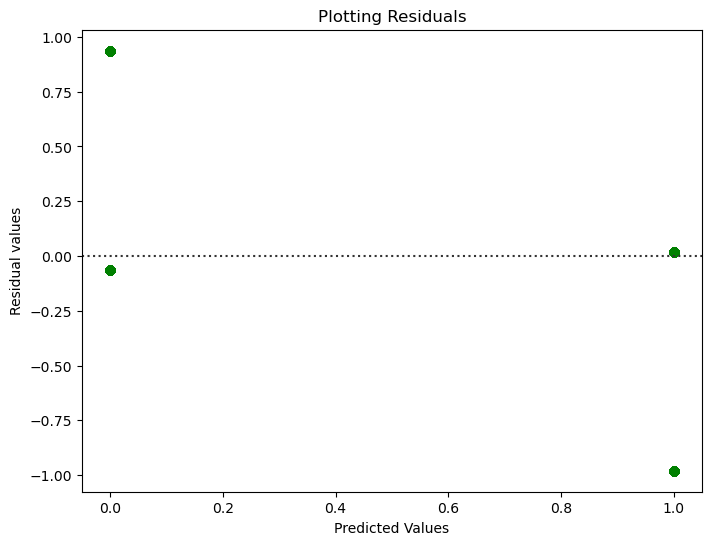

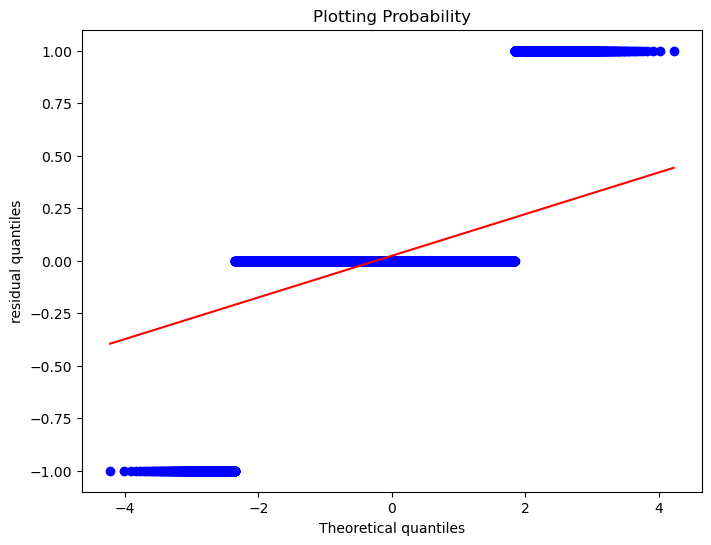

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from collections import Counter
import matplotlib.pyplot as plt

model = LogisticRegression(max_iter=1000000)

df=fraud
df=df.drop(["Time"],axis=1)

x=df.drop(["Class"],axis=1)
y=df["Class"]

smote = SMOTE(sampling_strategy='auto', random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)


x_train,x_test,y_train,y_test=train_test_split(x_resampled,y_resampled,test_size=0.1,random_state=50)


# Scale the input data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)





x_1=np.array(x_train_scaled)

# 'occ_managprof', 'occ_service','occ_service_np', 'occ_service_broad'
x_test_arr=np.array(x_test_scaled)



y_1=np.array(y_train)

regr = LogisticRegression(solver='liblinear')
regr.fit(x_1, y_1)
#print(regr.intercept_, regr.coef_,regr.score(x_1, y_1))

y_predict = regr.predict(x_test_arr)




# Generate example binary classification data with imbalanced classes
#actual = np.concatenate(y_1, y_predict)  # Imbalanced classes
#predicted = np.concatenate(y_1, y_predict)  # Imbalanced predictions

# Compute confusion matrix
cm = confusion_matrix(y_test, y_predict)
print("confusion matrix is \n",cm)

def check_class_weights(y_train,y_test,y_predict):
  
    class_counts = np.bincount(y_test)
    print("class counts",class_counts)
    # Compute total number of samples
    total_samples = np.sum(class_counts)
    print("total_samples",total_samples)
    # Calculate class weights
    class_weights = total_samples / (len(class_counts) * class_counts)
    print("class_weights",class_weights)
    # Print class weights
   
    weighted_accuracy = accuracy_score(y_test, y_predict, sample_weight=class_weights[y_test])
    print("weighted_accuracy",weighted_accuracy)

check_class_weights(y_1,y_test,y_predict)

def regression_results(y_1, y_predict):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_test, y_predict)
    mean_absolute_error=metrics.mean_absolute_error(y_test, y_predict) 
    mse=metrics.mean_squared_error(y_test, y_predict) 
    #mean_squared_log_error=metrics.mean_squared_log_error(y_test, predicted)
    median_absolute_error=metrics.median_absolute_error(y_test, y_predict)
    r2=metrics.r2_score(y_test, y_predict)

    print('explained_variance is ', round(explained_variance,2))    
    #print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2 is ', round(r2,4))
    print('MAE is ', round(mean_absolute_error,4))
    print('MSE is ', round(mse,4))
    print('RMSE is', round(np.sqrt(mse),4))
    

def predicted_plot(y_test, y_predict):
    plt.subplots(figsize=(8,6))
    plt.scatter(y_test, y_predict)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
    plt.xlabel("Actual ")
    plt.ylabel("Predicted ")
    plt.title("Actual vs. Predicted ")
    plt.show()
    
def residual_plot(y_test, y_predict):
    residual_value = y_test - y_predict
    plt.figure(figsize=(8,6))
    sns.residplot(x=y_predict, y=residual_value ,scatter_kws={"color": "green"})
    plt.title("Plotting Residuals")
    plt.xlabel("Predicted Values")
    plt.ylabel("Residual values")
    plt.show()
    return residual_value

def probability_plot(residual):
    plt.subplots(figsize=(8,6))
    stats.probplot(residual, plot=plt)
    plt.title('Plotting Probability')
    plt.xlabel('Theoretical quantiles')
    plt.ylabel('residual quantiles')
   
    plt.show()
    
regression_results(y_test,y_predict)
predicted_plot(y_test,y_predict)
residuals=residual_plot(y_test,y_predict)
probability_plot(residuals)
